In [18]:
#Depedencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
#Creating a set of random lats and longs
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-90, 90, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#Add lats and lngs into a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=75e94d1457c658e2bf71394dfd6c560e


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sabha
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | araouane
Processing Record 4 of Set 1 | tiznit
Processing Record 5 of Set 1 | kamenka
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | chicama
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | abha
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | penarroya-pueblonuevo
Processing Record 14 of Set 1 | selma
Processing Record 15 of Set 1 | toftir
City not found. Skipping...
Processing Record 16 of Set 1 | salinas
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | coihaique
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | jalu

Processing Record 36 of Set 4 | sorvag
City not found. Skipping...
Processing Record 37 of Set 4 | walvis bay
Processing Record 38 of Set 4 | premia de mar
Processing Record 39 of Set 4 | eirunepe
Processing Record 40 of Set 4 | santona
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | alegrete
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | guarapari
Processing Record 45 of Set 4 | luau
Processing Record 46 of Set 4 | urdoma
Processing Record 47 of Set 4 | acari
Processing Record 48 of Set 4 | susangerd
Processing Record 49 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 4 | honningsvag
Processing Record 1 of Set 5 | nacala
Processing Record 2 of Set 5 | londiani
Processing Record 3 of Set 5 | sao filipe
Processing Record 4 of Set 5 | antipovka
Processing Record 5 of Set 5 | chapadinha
Processing Record 6 of Set 5 | miraflores
Processing Record 7 of Set 5 | marsaxlokk
Processing Record

Processing Record 22 of Set 8 | matadi
Processing Record 23 of Set 8 | khakhea
Processing Record 24 of Set 8 | micheweni
Processing Record 25 of Set 8 | chapayevka
Processing Record 26 of Set 8 | alta floresta
Processing Record 27 of Set 8 | high rock
Processing Record 28 of Set 8 | iskateley
Processing Record 29 of Set 8 | ripanj
Processing Record 30 of Set 8 | beloha
Processing Record 31 of Set 8 | yumbe
Processing Record 32 of Set 8 | lasa
Processing Record 33 of Set 8 | bentiu
Processing Record 34 of Set 8 | junin
Processing Record 35 of Set 8 | mamou
Processing Record 36 of Set 8 | viedma
Processing Record 37 of Set 8 | valparaiso
Processing Record 38 of Set 8 | lerwick
Processing Record 39 of Set 8 | pavlodar
Processing Record 40 of Set 8 | berlevag
Processing Record 41 of Set 8 | henties bay
Processing Record 42 of Set 8 | biltine
Processing Record 43 of Set 8 | novyy urengoy
Processing Record 44 of Set 8 | bandarbeyla
Processing Record 45 of Set 8 | wilmington island
Processing

Processing Record 13 of Set 12 | zasheyek
Processing Record 14 of Set 12 | sao miguel do araguaia
Processing Record 15 of Set 12 | horasan
Processing Record 16 of Set 12 | varhaug
Processing Record 17 of Set 12 | brae
Processing Record 18 of Set 12 | chipata
Processing Record 19 of Set 12 | tucurui
Processing Record 20 of Set 12 | moroni
Processing Record 21 of Set 12 | lyubech
Processing Record 22 of Set 12 | alice town
Processing Record 23 of Set 12 | ananas
Processing Record 24 of Set 12 | portobelo
Processing Record 25 of Set 12 | dakar
Processing Record 26 of Set 12 | aksu
Processing Record 27 of Set 12 | pitanga
Processing Record 28 of Set 12 | czluchow
Processing Record 29 of Set 12 | tombouctou
Processing Record 30 of Set 12 | aquiraz
Processing Record 31 of Set 12 | montevideo
Processing Record 32 of Set 12 | pangnirtung
Processing Record 33 of Set 12 | mbacke
City not found. Skipping...
Processing Record 34 of Set 12 | ler
Processing Record 35 of Set 12 | antonina
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sabha,27.04,14.43,85.87,15,0,11.86,LY,2020-10-27 14:43:19
1,Hamilton,39.18,-84.53,48.20,87,90,3.36,US,2020-10-27 14:43:19
2,Araouane,18.90,-3.53,98.28,9,12,11.45,ML,2020-10-27 14:43:19
3,Tiznit,29.58,-9.50,72.70,43,0,9.48,MA,2020-10-27 14:42:54
4,Kamenka,51.32,42.77,41.00,69,61,8.88,RU,2020-10-27 14:43:19
5,Chicama,-7.84,-79.15,62.60,88,90,6.93,PE,2020-10-27 14:43:20
6,Port Elizabeth,-33.92,25.57,71.60,73,0,11.41,ZA,2020-10-27 14:43:21
7,Abha,18.22,42.51,73.40,11,20,13.87,SA,2020-10-27 14:43:21
8,Luderitz,-26.65,15.16,63.97,62,95,17.34,NA,2020-10-27 14:43:21
9,Ushuaia,-54.80,-68.30,42.80,52,40,18.34,AR,2020-10-27 14:41:17


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
import time

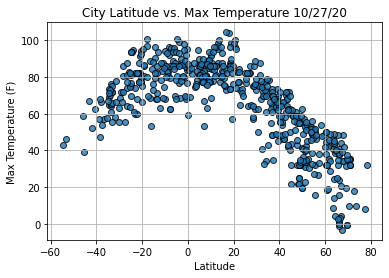

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

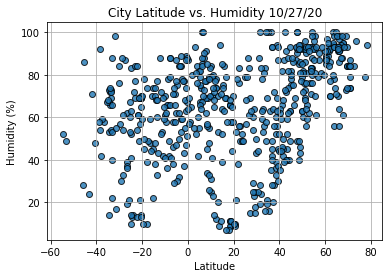

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

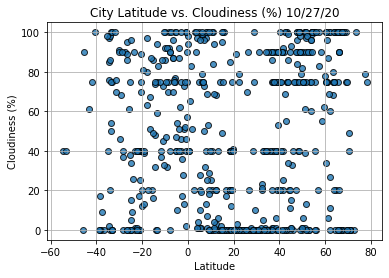

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

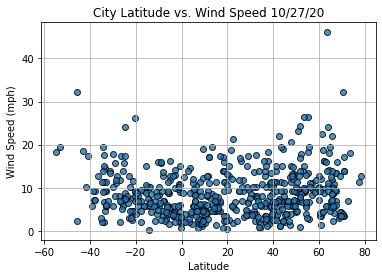

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

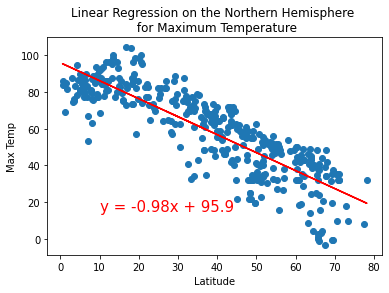

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title='Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
# Call the function. plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)
plot_linear_regression(x_values, y_values, title, 'Max Temp',(10,15))

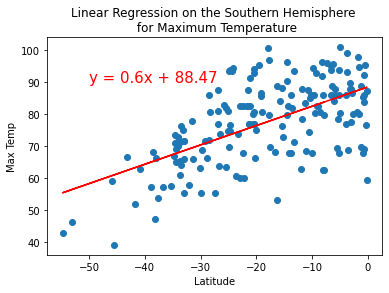

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp',(-50,90))

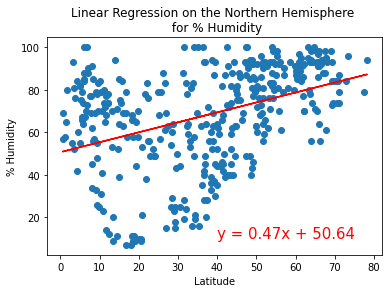

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = 'Linear Regression on the Northern Hemisphere \n for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Humidity',(40,10))

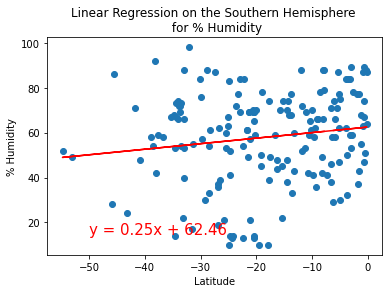

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = 'Linear Regression on the Southern Hemisphere \n for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Humidity',(-50,15))

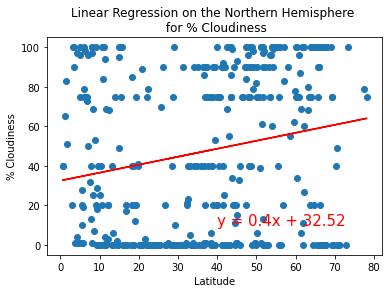

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = 'Linear Regression on the Northern Hemisphere \n for % Cloudiness'
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Cloudiness',(40,10))

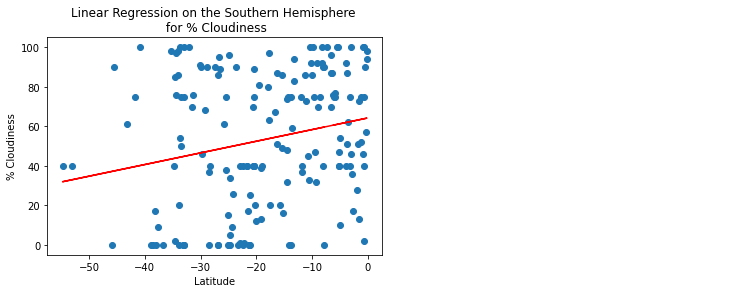

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = 'Linear Regression on the Southern Hemisphere \n for % Cloudiness'
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Cloudiness',(40,10))

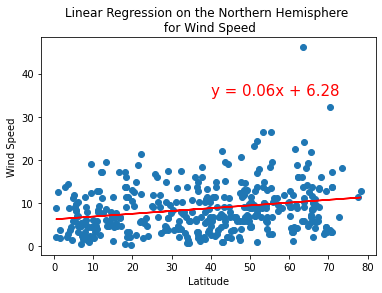

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = 'Linear Regression on the Northern Hemisphere \n for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(40,35))

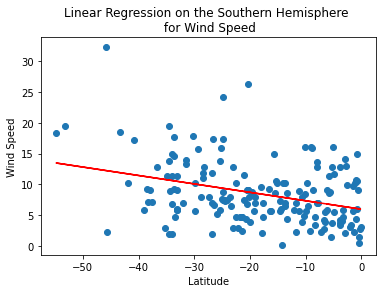

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = 'Linear Regression on the Southern Hemisphere \n for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(-50,35))
